# Imports

In [40]:
using DataFrames
using CSV
using MLJ
using Plots
using StatsBase

include("../../lib.jl")

ENV["LINES"]=50;

# Dataset

In [41]:
data = CSV.read("./data.csv")

thread = 1 warning: only found 32 / 33 columns around data row: 2. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 3. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 4. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 5. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 6. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 7. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 8. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 9. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 10. Filling remaining columns with `missing`
thread = 1 warning: only fo

thread = 1 warning: only found 32 / 33 columns around data row: 97. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 98. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 99. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 100. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 101. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 102. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 103. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 104. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 105. Filling remaining columns with `missing`
thread = 1 wa

thread = 1 warning: only found 32 / 33 columns around data row: 191. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 192. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 193. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 194. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 195. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 196. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 197. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 198. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 199. Filling remaining columns with `missing`
thread = 1

thread = 1 warning: only found 32 / 33 columns around data row: 285. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 286. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 287. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 288. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 289. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 290. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 291. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 292. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 293. Filling remaining columns with `missing`
thread = 1

thread = 1 warning: only found 32 / 33 columns around data row: 379. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 380. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 381. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 382. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 383. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 384. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 385. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 386. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 387. Filling remaining columns with `missing`
thread = 1

thread = 1 warning: only found 32 / 33 columns around data row: 473. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 474. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 475. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 476. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 477. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 478. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 479. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 480. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 481. Filling remaining columns with `missing`
thread = 1

thread = 1 warning: only found 32 / 33 columns around data row: 567. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 568. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 569. Filling remaining columns with `missing`
thread = 1 warning: only found 32 / 33 columns around data row: 570. Filling remaining columns with `missing`


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
,Int64,String,Float64,Float64,Float64,Float64,Float64
1,842302,M,17.99,10.38,122.8,1001.0,0.1184
2,842517,M,20.57,17.77,132.9,1326.0,0.08474
3,84300903,M,19.69,21.25,130.0,1203.0,0.1096
4,84348301,M,11.42,20.38,77.58,386.1,0.1425
5,84358402,M,20.29,14.34,135.1,1297.0,0.1003
6,843786,M,12.45,15.7,82.57,477.1,0.1278
7,844359,M,18.25,19.98,119.6,1040.0,0.09463
8,84458202,M,13.71,20.83,90.2,577.9,0.1189
9,844981,M,13.0,21.82,87.5,519.8,0.1273


In [42]:
data = data[:, Not([33, 1])]
describe(data)

,variable,mean,min,median,max,nunique,nmissing
,Symbol,Union…,Any,Union…,Any,Union…,Nothing
1,diagnosis,,B,,M,2,
2,radius_mean,14.1273,6.981,13.37,28.11,,
3,texture_mean,19.2896,9.71,18.84,39.28,,
4,perimeter_mean,91.969,43.79,86.24,188.5,,
5,area_mean,654.889,143.5,551.1,2501.0,,
6,smoothness_mean,0.0963603,0.05263,0.09587,0.1634,,
7,compactness_mean,0.104341,0.01938,0.09263,0.3454,,
8,concavity_mean,0.0887993,0.0,0.06154,0.4268,,
9,concave points_mean,0.0489191,0.0,0.0335,0.2012,,


Look at class labels to see if dataset is imbalanced

In [43]:
label_counts = countmap(data[:diagnosis])

Dict{String,Int64} with 2 entries:
  "B" => 357
  "M" => 212

In [44]:
collect(label_counts[i] / size(data)[1] for i in keys(label_counts))

2-element Array{Float64,1}:
 0.6274165202108963
 0.37258347978910367

Get data ready for training

In [45]:
coerce!(data, :diagnosis=>Multiclass)
schema(data)

┌─────────────────────────┬─────────────────────────────────┬───────────────┐
│ _.names                 │ _.types                         │ _.scitypes    │
├─────────────────────────┼─────────────────────────────────┼───────────────┤
│ diagnosis               │ CategoricalValue{String,UInt32} │ Multiclass{2} │
│ radius_mean             │ Float64                         │ Continuous    │
│ texture_mean            │ Float64                         │ Continuous    │
│ perimeter_mean          │ Float64                         │ Continuous    │
│ area_mean               │ Float64                         │ Continuous    │
│ smoothness_mean         │ Float64                         │ Continuous    │
│ compactness_mean        │ Float64                         │ Continuous    │
│ concavity_mean          │ Float64                         │ Continuous    │
│ concave points_mean     │ Float64                         │ Continuous    │
│ symmetry_mean           │ Float64                         │ Co

In [46]:
y, X = unpack(data, ==(:diagnosis), colname->true)

(CategoricalValue{String,UInt32}["M", "M", "M", "M", "M", "M", "M", "M", "M", "M"  …  "B", "B", "B", "M", "M", "M", "M", "M", "M", "B"], 569×30 DataFrame. Omitted printing of 26 columns
│ Row │ radius_mean │ texture_mean │ perimeter_mean │ area_mean │
│     │ Float64     │ Float64      │ Float64        │ Float64   │
├─────┼─────────────┼──────────────┼────────────────┼───────────┤
│ 1   │ 17.99       │ 10.38        │ 122.8          │ 1001.0    │
│ 2   │ 20.57       │ 17.77        │ 132.9          │ 1326.0    │
│ 3   │ 19.69       │ 21.25        │ 130.0          │ 1203.0    │
│ 4   │ 11.42       │ 20.38        │ 77.58          │ 386.1     │
│ 5   │ 20.29       │ 14.34        │ 135.1          │ 1297.0    │
│ 6   │ 12.45       │ 15.7         │ 82.57          │ 477.1     │
│ 7   │ 18.25       │ 19.98        │ 119.6          │ 1040.0    │
│ 8   │ 13.71       │ 20.83        │ 90.2           │ 577.9     │
│ 9   │ 13.0        │ 21.82        │ 87.5           │ 519.8     │
│ 10  │ 12.46       │ 

Partition train and test data accoring to class labels

In [47]:
# data to use when trying to fit a single validation set
train, test = partition(eachindex(y), 0.7, shuffle=true, rng=123, stratify=values(data[:diagnosis])) # gives 70:30 split

([483, 534, 159, 31, 170, 416, 231, 43, 161, 286  …  134, 500, 395, 533, 112, 396, 297, 106, 303, 261], [392, 390, 320, 27, 328, 477, 19, 356, 518, 444  …  136, 559, 505, 274, 508, 358, 90, 296, 79, 415])

In [48]:
train_counts = countmap(data[train,:diagnosis])
collect(train_counts[i] / size(train)[1] for i in keys(train_counts))

2-element Array{Float64,1}:
 0.628140703517588
 0.37185929648241206

In [49]:
test_counts = countmap(data[test,:diagnosis])
collect(test_counts[i] / size(test)[1] for i in keys(test_counts))

2-element Array{Float64,1}:
 0.6257309941520468
 0.3742690058479532

# Five Learning Algorithms

* Decision trees with some form of pruning
* Neural networks
* Boosting
* Support Vector Machines
* k-nearest neighbors


##### Testing
* Implement the algorithms
* Design two *interesting* classification problems. For the purposes of this assignment, a classification problem is just a set of training examples and a set of test examples.

In [50]:
models(matching(X,y))

43-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AdaBoostClassifier, package_name = ScikitLearn, ... )
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = BaggingClassifier, package_name = ScikitLearn, ... )
 (name = BayesianLDA, package_name = MultivariateStats, ... )
 (name = BayesianLDA, package_name = ScikitLearn, ... )
 (name = BayesianQDA, package_name = ScikitLearn, ... )
 (name = BayesianSubspaceLDA, package_name = MultivariateStats, ... )
 (name = ConstantClassifier, package_name = MLJModels, ... )
 (name = DecisionTreeClassifier, package_name = DecisionTree, ... )
 (name = DeterministicConstantClassifier, package_na

In [51]:
@load AdaBoostClassifier verbosity=2

import MLJScikitLearnInterface ✔
import MLJScikitLearnInterface ✔


┌ Info: Loading into module "Main": 
└ @ MLJModels /home/andrew/.julia/packages/MLJModels/5DFoi/src/loading.jl:70
┌ Warning: New model type being bound to `AdaBoostClassifier2` to avoid conflict with an existing name. 
└ @ MLJModels /home/andrew/.julia/packages/MLJModels/5DFoi/src/loading.jl:78


AdaBoostClassifier(
    base_estimator = nothing,
    n_estimators = 50,
    learning_rate = 1.0,
    algorithm = "SAMME.R",
    random_state = nothing) @766

### Boosting
* Implement or steal a boosted version of your decision trees. 
* As before, you will want to use some form of pruning, but presumably because you're using boosting you can afford to be much more aggressive about your pruning.

**Chooses the hardest examples** talk about in write-up

In [52]:
boost_model = AdaBoostClassifier()

AdaBoostClassifier(
    base_estimator = nothing,
    n_estimators = 50,
    learning_rate = 1.0,
    algorithm = "SAMME.R",
    random_state = nothing) @589

In [53]:
boost_mach = machine(boost_model, X, y)

Machine{AdaBoostClassifier} @874 trained 0 times.
  args: 
    1:	Source @200 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @474 ⏎ `AbstractArray{Multiclass{2},1}`


In [54]:
fit!(boost_mach, rows=train, verbosity=2)

┌ Info: Training Machine{AdaBoostClassifier} @874.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/cJmIS/src/machines.jl:322


Machine{AdaBoostClassifier} @874 trained 1 time.
  args: 
    1:	Source @200 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @474 ⏎ `AbstractArray{Multiclass{2},1}`


In [55]:
boost_acc = evaluate!(boost_mach, resampling=CV(shuffle=true), measure=[cross_entropy, acc], 
                      verbosity=1, check_measure=false)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────────┬───────────────┬────────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                 │
├───────────────┼───────────────┼────────────────────────────────────────────┤
│ cross_entropy │ 0.455         │ [0.441, 0.442, 0.443, 0.498, 0.417, 0.491] │
│ acc           │ 0.954         │ [0.937, 0.968, 0.947, 0.947, 0.968, 0.957] │
└───────────────┴───────────────┴────────────────────────────────────────────┘
_.per_observation = [[[0.24, 0.347, ..., 0.253], [0.559, 0.651, ..., 0.36], [0.616, 0.191, ..., 0.565], [0.528, 0.553, ..., 0.436], [0.655, 0.304, ..., 1.1], [0.532, 0.423, ..., 0.56]], missing]


In [56]:
evaluate!(boost_mach, resampling=CV(shuffle=true), measure=[tnr,tpr,fnr,fpr], verbosity=1, operation=predict_mode)

┌ Warning: The classes are un-ordered,
│ using: negative='B' and positive='M'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/cJmIS/src/measures/confusion_matrix.jl:83
┌ Warning: The classes are un-ordered,
│ using: negative='B' and positive='M'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/cJmIS/src/measures/confusion_matrix.jl:83
┌ Warning: The classes are un-ordered,
│ using: negative='B' and positive='M'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/cJmIS/src/measures/confusion_matrix.jl:83
┌ Warning: The classes are un-ordered,
│ using: negative='B' and positive='M'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/cJmIS/src/measures/confusion_matrix.jl:83
Evaluating over 6 folds:  17%[====>                    ]  ETA: 0

┌─────────────────────┬───────────────┬────────────────────────────────────────────┐
│ _.measure           │ _.measurement │ _.per_fold                                 │
├─────────────────────┼───────────────┼────────────────────────────────────────────┤
│ true_negative_rate  │ 0.988         │ [1.0, 1.0, 1.0, 0.964, 0.982, 0.984]       │
│ true_positive_rate  │ 0.93          │ [0.933, 0.946, 0.857, 0.975, 1.0, 0.871]   │
│ false_negative_rate │ 0.0696        │ [0.0667, 0.0541, 0.143, 0.025, 0.0, 0.129] │
│ false_positive_rate │ 0.0117        │ [0.0, 0.0, 0.0, 0.0364, 0.0179, 0.0159]    │
└─────────────────────┴───────────────┴────────────────────────────────────────────┘
_.per_observation = [missing, missing, missing, missing]


In [57]:
fitted_params(boost_mach);

### GridSearch 
number of estimators vs learning rate

In [58]:
param1 = :learning_rate
param2 = :n_estimators

r1 = range(boost_model, param1, lower=0.1, upper=1, scale=:linear)
r2 = range(boost_model, param2, lower=10, upper=100, scale=:log10)

MLJBase.NumericRange(Int64, :n_estimators, ... )

In [59]:
self_tuning_boost_model = TunedModel(model=boost_model,
                                    tuning=Grid(),
                                    resampling=CV(), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

ProbabilisticTunedModel(
    model = AdaBoostClassifier(
            base_estimator = nothing,
            n_estimators = 50,
            learning_rate = 1.0,
            algorithm = "SAMME.R",
            random_state = nothing),
    tuning = Grid(
            goal = nothing,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = CV(
            nfolds = 6,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = cross_entropy(
            eps = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{T,MLJBase.Bounded,Symbol} where T[NumericRange{Float64,…} @023, NumericRange{Int64,…} @909],
    train_best = true,
    repeats = 1,
    n = nothing,
    acceleration = CPUThreads{Int64}(1),
    acceleration_resampling = CPU1{Nothing}(nothing),
    check_measure = true) @830

In [60]:
self_tuning_boost = machine(self_tuning_boost_model, X, y)

Machine{ProbabilisticTunedModel{Grid,…}} @973 trained 0 times.
  args: 
    1:	Source @979 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @117 ⏎ `AbstractArray{Multiclass{2},1}`


In [61]:
z = fit!(self_tuning_boost, rows=train)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @973.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/cJmIS/src/machines.jl:322
┌ Info: Attempting to evaluate 100 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/nuvTc/src/tuned_models.jl:501
Evaluating over 100 metamodels: 100%[=========================] Time: 0:00:47


Machine{ProbabilisticTunedModel{Grid,…}} @973 trained 1 time.
  args: 
    1:	Source @979 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @117 ⏎ `AbstractArray{Multiclass{2},1}`


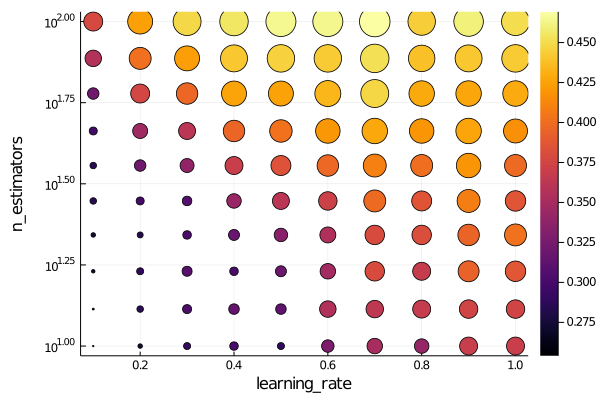

In [23]:
plot(self_tuning_boost)

In [62]:
best = fitted_params(self_tuning_boost)
best.best_model

AdaBoostClassifier(
    base_estimator = nothing,
    n_estimators = 10,
    learning_rate = 0.1,
    algorithm = "SAMME.R",
    random_state = nothing) @081

In [63]:
best_loss = round(z.report.best_result.measurement[1],digits=5)

0.25409

In [64]:
best_n = best.best_model.n_estimators
best_lr = best.best_model.learning_rate

0.1

In [27]:
fn = "Figures/LearningCurve_Boost_nestimators:$(best_n)_lr:$(best_lr)_loss:$(best_loss)"
png(replace(fn,'.' => ','))

### Learning Curves

In [78]:
data_schedule, training_losses, valid_losses = learn_curve(best.best_model, X[train,:], y[train], acc)

(d, train_metric, valid_metric) = (10, 1.0, 0.8875)
(d, train_metric, valid_metric) = (11, 1.0, 0.9375)
(d, train_metric, valid_metric) = (12, 1.0, 0.925)
(d, train_metric, valid_metric) = (13, 1.0, 0.925)
(d, train_metric, valid_metric) = (14, 1.0, 0.8875)
(d, train_metric, valid_metric) = (15, 1.0, 0.8875)
(d, train_metric, valid_metric) = (16, 1.0, 0.925)
(d, train_metric, valid_metric) = (17, 1.0, 0.925)
(d, train_metric, valid_metric) = (18, 1.0, 0.925)
(d, train_metric, valid_metric) = (19, 1.0, 0.9125)
(d, train_metric, valid_metric) = (20, 1.0, 0.925)
(d, train_metric, valid_metric) = (21, 1.0, 0.925)
(d, train_metric, valid_metric) = (22, 1.0, 0.925)
(d, train_metric, valid_metric) = (23, 1.0, 0.925)
(d, train_metric, valid_metric) = (24, 1.0, 0.925)
(d, train_metric, valid_metric) = (25, 1.0, 0.925)
(d, train_metric, valid_metric) = (26, 1.0, 0.9125)
(d, train_metric, valid_metric) = (27, 1.0, 0.925)
(d, train_metric, valid_metric) = (28, 1.0, 0.925)
(d, train_metric, valid_m

(d, train_metric, valid_metric) = (156, 0.9743589743589743, 0.9375)
(d, train_metric, valid_metric) = (157, 0.9745222929936306, 0.9375)
(d, train_metric, valid_metric) = (158, 0.9746835443037974, 0.9375)
(d, train_metric, valid_metric) = (159, 0.9748427672955975, 0.9375)
(d, train_metric, valid_metric) = (160, 0.975, 0.9375)
(d, train_metric, valid_metric) = (161, 0.9751552795031055, 0.9375)
(d, train_metric, valid_metric) = (162, 0.9753086419753086, 0.9375)
(d, train_metric, valid_metric) = (163, 0.9693251533742331, 0.9375)
(d, train_metric, valid_metric) = (164, 0.9695121951219512, 0.9375)
(d, train_metric, valid_metric) = (165, 0.9696969696969697, 0.9375)
(d, train_metric, valid_metric) = (166, 0.9698795180722891, 0.9375)
(d, train_metric, valid_metric) = (167, 0.9700598802395209, 0.9375)
(d, train_metric, valid_metric) = (168, 0.9702380952380952, 0.9375)
(d, train_metric, valid_metric) = (169, 0.9704142011834319, 0.9375)
(d, train_metric, valid_metric) = (170, 0.9705882352941176, 0

(d, train_metric, valid_metric) = (281, 0.9608540925266904, 0.9375)
(d, train_metric, valid_metric) = (282, 0.9609929078014184, 0.9375)
(d, train_metric, valid_metric) = (283, 0.9611307420494699, 0.9375)
(d, train_metric, valid_metric) = (284, 0.9612676056338029, 0.9375)
(d, train_metric, valid_metric) = (285, 0.9614035087719298, 0.9375)
(d, train_metric, valid_metric) = (286, 0.9615384615384616, 0.9375)
(d, train_metric, valid_metric) = (287, 0.9616724738675958, 0.9375)
(d, train_metric, valid_metric) = (288, 0.9618055555555556, 0.9375)
(d, train_metric, valid_metric) = (289, 0.9515570934256056, 0.9375)
(d, train_metric, valid_metric) = (290, 0.9517241379310345, 0.9375)
(d, train_metric, valid_metric) = (291, 0.9518900343642611, 0.9375)
(d, train_metric, valid_metric) = (292, 0.952054794520548, 0.9375)
(d, train_metric, valid_metric) = (293, 0.9522184300341296, 0.9375)
(d, train_metric, valid_metric) = (294, 0.9523809523809523, 0.9375)
(d, train_metric, valid_metric) = (295, 0.9525423

(10:1:318, Any[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.948220064724919, 0.9483870967741935, 0.9485530546623794, 0.9487179487179487, 0.9488817891373802, 0.9490445859872612, 0.9492063492063492, 0.9493670886075949, 0.9463722397476341, 0.9465408805031447], Any[0.8875, 0.9375, 0.925, 0.925, 0.8875, 0.8875, 0.925, 0.925, 0.925, 0.9125  …  0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.9375, 0.9375])

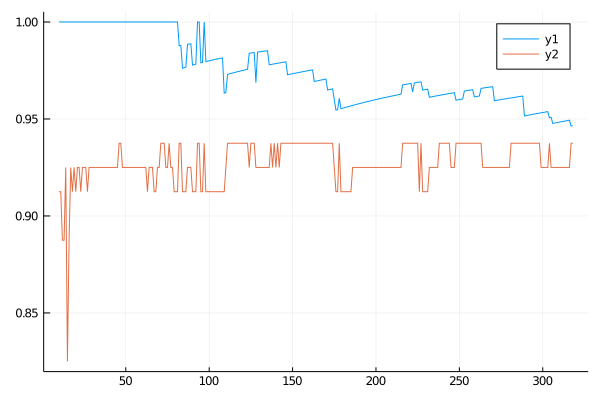

In [76]:
plot(data_schedule, training_losses)
plot!(data_schedule, valid_losses)

# Final Results

In [29]:
final_boost_model = best.best_model

AdaBoostClassifier(
    base_estimator = nothing,
    n_estimators = 10,
    learning_rate = 0.1,
    algorithm = "SAMME.R",
    random_state = nothing) @665

In [30]:
Final_Boost = machine(final_boost_model, X, y)

Machine{AdaBoostClassifier} @893 trained 0 times.
  args: 
    1:	Source @775 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @402 ⏎ `AbstractArray{Multiclass{2},1}`


In [31]:
fit!(Final_Boost, rows=train, verbosity=2)

┌ Info: Training Machine{AdaBoostClassifier} @893.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/cJmIS/src/machines.jl:322


Machine{AdaBoostClassifier} @893 trained 1 time.
  args: 
    1:	Source @775 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @402 ⏎ `AbstractArray{Multiclass{2},1}`


In [32]:
ŷ2 = predict(Final_Boost, X[test,:]);

LoadError: UndefVarError: predict not defined

In [33]:
cross_entropy(ŷ2, y[test]) |> mean

LoadError: UndefVarError: ŷ2 not defined

In [34]:
acc(ŷ2, y[test])

LoadError: UndefVarError: ŷ2 not defined

In [ ]:
confusion_matrix(mode.(ŷ), y[test])